**Run the following two cells before you begin.**

In [10]:
%autosave 10

Autosaving every 10 seconds


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [12]:
# Import data set
cleaned_data=pd.read_csv("https://raw.githubusercontent.com/jsneha1710/Data-Science-Intern-2-Mini-Project-Task/master/Task%201%20Data%20set/cleaned_data.csv")


In [13]:
# Create features list
features=['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X=cleaned_data[features]
y=cleaned_data['default payment next month']

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=24)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [15]:
scaler=MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [68]:
logreg = LogisticRegression(solver='saga',penalty='l1',max_iter=1000)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [17]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('scaler',MinMaxScaler()),('model',LogisticRegression())])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [30]:
# Use `get_params`
pipeline.get_params



<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [38]:
# View what `model__C` is set to currently
pipeline.set_params()


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [39]:
# Change `model__C` to 2
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [63]:
pipeline.set_params(model__C=2.0)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [49]:
 C_vals = [ 10**2 ,  10 ,  1 , 10**-1 , 10**-2, 10**-3  ]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [50]:
k_folds=StratifiedKFold(n_splits=4,random_state=1)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [76]:
def cross_val_C_search_pipe(pipeline,vals):
    pipeline.set_params(model__C=vals)
    pipeline.get_params()
  
    

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [89]:

pred_test_full =0
cv_score =[]
i=1
for i in C_vals:
    for train_index,test_index in k_folds.split(X_train,y_train):
        print('{} of KFold {}'.format(i,k_folds.n_splits))
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y.loc[train_index],y.loc[test_index]
        cross_val_C_search_pipe(pipeline,i)
        pipeline.fit(xtr,ytr)
        score = roc_auc_score(yvl,pipeline.predict(xvl))
        print('ROC AUC score:',score)
        

100 of KFold 4
ROC AUC score: 0.6017674902186108
100 of KFold 4


C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.6080197898851698
100 of KFold 4
ROC AUC score: 0.6189539774065206
100 of KFold 4
ROC AUC score: 0.6135945689103064
10 of KFold 4


C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

ROC AUC score: 0.6001915032895931
10 of KFold 4
ROC AUC score: 0.6071765918208113
10 of KFold 4
ROC AUC score: 0.6179204243464007
10 of KFold 4
ROC AUC score: 0.612204392821335
1 of KFold 4
ROC AUC score: 0.5944263946621648
1 of KFold 4


C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.6012622849396689
1 of KFold 4
ROC AUC score: 0.6046223283394039
1 of KFold 4
ROC AUC score: 0.6052672408965203
0.1 of KFold 4


C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.5358460712933731
0.1 of KFold 4
ROC AUC score: 0.5327357683850477
0.1 of KFold 4
ROC AUC score: 0.5356362214332241
0.1 of KFold 4
ROC AUC score:

C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 0.5459315966682844
0.01 of KFold 4
ROC AUC score: 0.5002463468588274
0.01 of KFold 4
ROC AUC score: 0.5016129032258064
0.01 of KFold 4
ROC AUC score: 0.500647750590984
0.01 of KFold 4
ROC AUC score:

C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 0.5003458279572376
0.001 of KFold 4
ROC AUC score: 0.5
0.001 of KFold 4
ROC AUC score: 0.5
0.001 of KFold 4
ROC AUC score: 0.5
0.001 of KFold 4
ROC AUC score: 0.5


C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

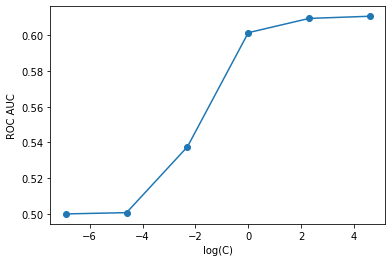

In [104]:
x=np.log(C_vals)
hundred=np.array([ 0.6017674902186108, 0.6080197898851698,0.6189539774065206,0.6135945689103064])
ten=np.array([0.6001915032895931,0.6071765918208113,0.6179204243464007,0.612204392821335])
one=np.array([0.5944263946621648,0.6012622849396689,0.6046223283394039,0.6052672408965203])
p1=np.array([0.5358460712933731,0.5327357683850477,0.5356362214332241,0.5459315966682844])
p2=np.array([0.5002463468588274,0.5016129032258064,0.500647750590984,0.5003458279572376])
p3=np.array([0.5,0.5,0.5,0.5])
roc_p=[hundred.mean(),ten.mean(),one.mean(),p1.mean(),p2.mean(),p3.mean()]
plt.plot(x,roc_p,marker='o')
plt.xlabel("log(C)")
plt.ylabel("ROC AUC")
plt.show()




_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [118]:
from sklearn.preprocessing import PolynomialFeatures
interaction=PolynomialFeatures(degree=2)
d=interaction.fit_transform(X_train)




MemoryError: 

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [107]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=24)


In [111]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.


In [ ]:
# Plot the average training and testing ROC AUC across folds, for each C value.


**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**